In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Titanic_train.csv')

In [2]:
df.head()
df.tail()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'))


In [9]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')

In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.to_csv('Cleaned_Titanic_ML.csv', index= False)

In [14]:
# Basic value counts
df['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

In [15]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [70]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C          0.553571
Q          0.389610
S          0.336957
Unknown    1.000000
Name: Survived, dtype: float64

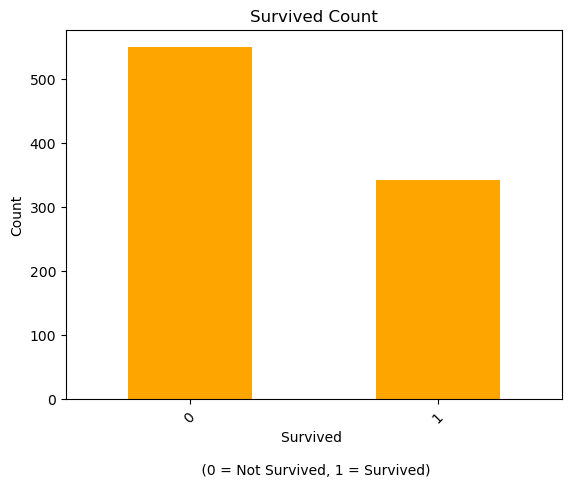

In [69]:
# Survival Bar plot
plt.figure
df['Survived'].value_counts().plot(kind = 'bar', color='Orange')
plt.title('Survived Count')
plt.xlabel('Survived \n\n (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

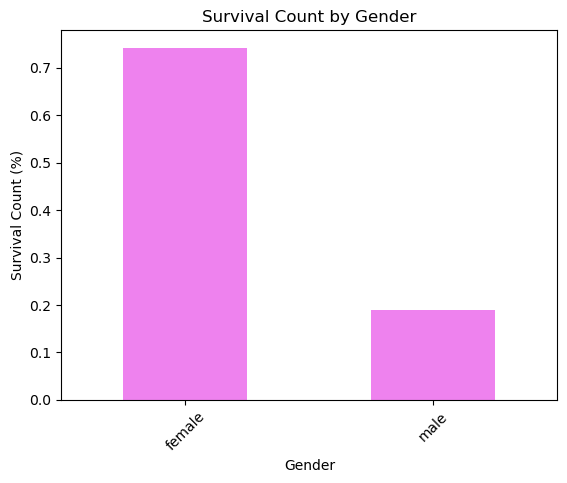

In [45]:
# Survival Count by gender
plt.figure
df.groupby('Sex')['Survived'].mean().plot(kind = 'bar', color='Violet')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Count (%)')
plt.xticks(rotation=45)
plt.show()

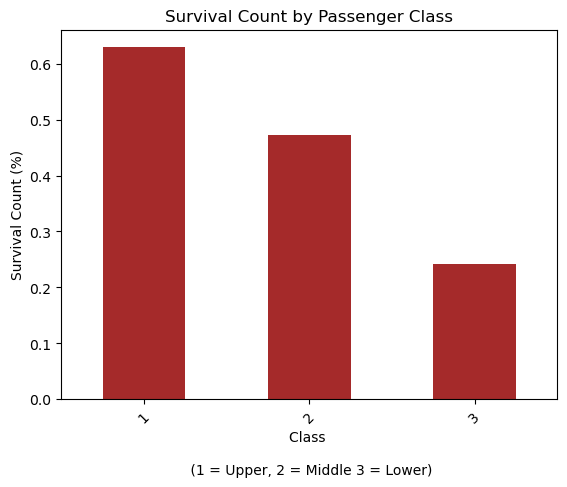

In [68]:
# Survival Count by Passenger Class
plt.figure
df.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', color='Brown')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Class \n\n (1 = Upper, 2 = Middle 3 = Lower)')
plt.ylabel('Survival Count (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Embarked VS Survival
plt.figure
df.groupby('Embarked')['Survived'].mean().plot(kind = 'bar', color='')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Port \n\n (C = Chebourge, 2 = Queenstown 3 = Southhampto)')
plt.ylabel('Survival Count (%)')
plt.xticks(rotation=45)
plt.show()